# Aidan Tata-Lobo
# Data Science Programming
# 12/11/2023
# Final Project: Netflix Analysis

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
datafile = "C:/Users/atata/Desktop/2023 fall/data_new.csv"
df = pd.read_csv(datafile)

### 1. What regions have the best produced content?

In [226]:
#Function that labels anything with multiple countries as "Multiple Countries"
def label_multiple_countries(countries):
    if pd.notna(countries) and ',' in countries:
        return 'Multiple Countries'
    else:
        return countries

#Apply the function to the countries column
df['production_countries'] = df['production_countries'].apply(label_multiple_countries)

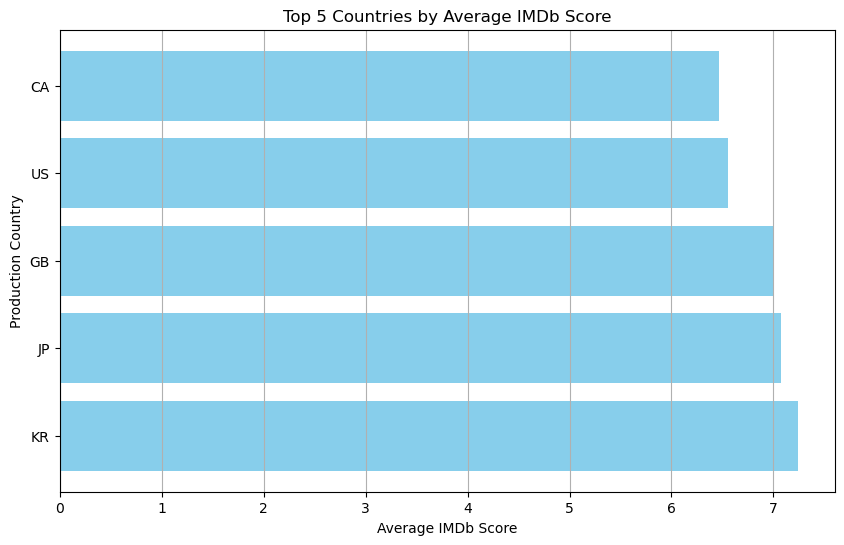

In [227]:
#Filter dataFrame to include only countries with value count more than 100
filtered_df = df.groupby('production_countries').filter(lambda x: len(x) > 100)

#Group by production_countries and calculate the mean of score
average_scores = filtered_df.groupby('production_countries')['imdb_score'].mean()

#Convert the result back to a DataFrame and reset index
average_scores_df = average_scores.reset_index()

#Sort DataFrame by average score in descending order
average_scores_df = average_scores_df.sort_values(by='imdb_score', ascending=False)

#Take top 5 countries
top_countries = average_scores_df.head(5)

#Plot
plt.figure(figsize=(10, 6))
plt.barh(top_countries['production_countries'], top_countries['imdb_score'], color='skyblue')
plt.title('Top 5 Countries by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Production Country')
plt.grid(axis='x')
plt.savefig('graph1.png')
plt.show()


### 2. Does movie runtime correlate to the popularity of a movie?

C:\Users\atata\AppData\Local\Temp\ipykernel_1624\1781705977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['runtime_group'] = pd.cut(df2['runtime'], bins=[0, 90, 120, float('inf')], labels=['<90', '90-120', '120+'])
C:\Users\atata\AppData\Local\Temp\ipykernel_1624\1781705977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['decade'] = (df2['year'] // 10) * 10


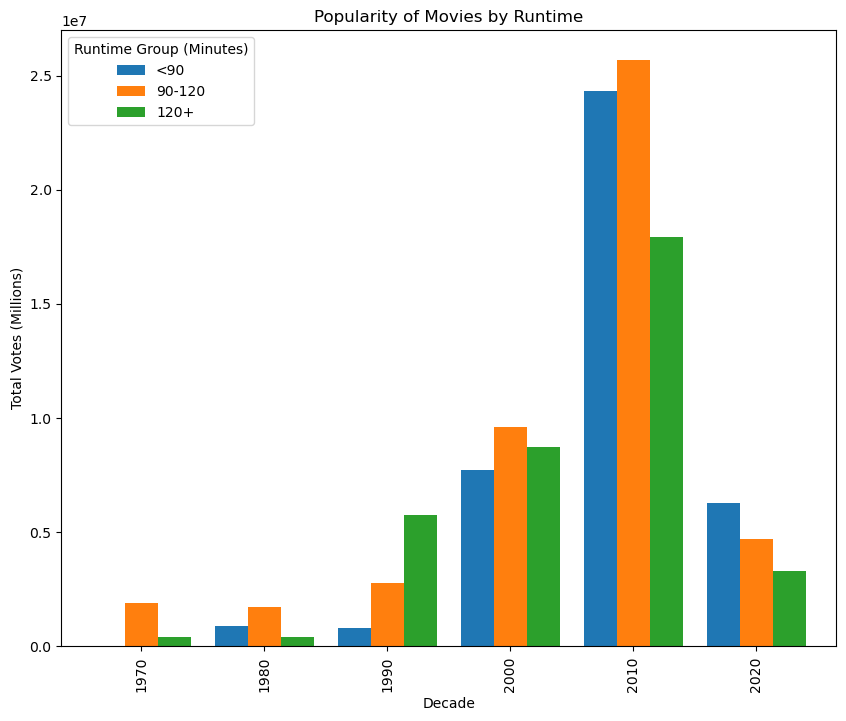

In [228]:
#Filter for only years 1970 and beyond
df2 = df.loc[df['year'] >= 1970]

#Create a new column for runtime groups
df2['runtime_group'] = pd.cut(df2['runtime'], bins=[0, 90, 120, float('inf')], labels=['<90', '90-120', '120+'])

#Extract decades year column
df2['decade'] = (df2['year'] // 10) * 10

#Group by decade and runtime, then sum the votes
total_votes = df2.groupby(['decade', 'runtime_group'])['imdb_votes'].sum().reset_index()

#Pivot the table
total_votes_pivot = total_votes.pivot(index='decade', columns='runtime_group', values='imdb_votes')

#Plot
total_votes_pivot.plot(kind='bar', width=0.8, figsize=(10, 8))
plt.title('Popularity of Movies by Runtime')
plt.xlabel('Decade')
plt.ylabel('Total Votes (Millions)')
plt.legend(title='Runtime Group (Minutes)')
plt.savefig('graph2.png')
plt.show()

### 3. As time goes on, has the overall reception of movies being made gone up or down?

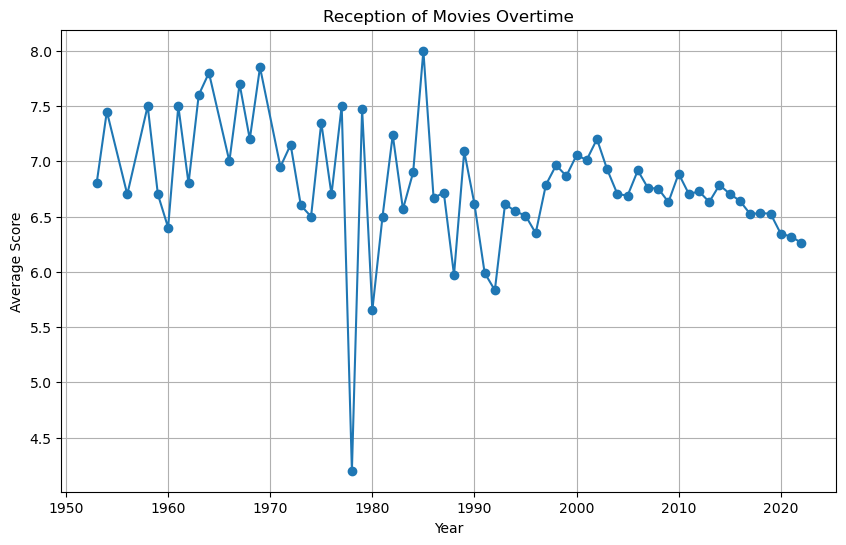

In [229]:
#Group each data by year, then average the score for each year
average_scores = df.groupby('year')['imdb_score'].mean()
average_scores_df = average_scores.reset_index()

#Plot
plt.figure(figsize=(10, 6))
plt.plot(average_scores_df['year'], average_scores_df['imdb_score'], marker='o')
plt.title('Reception of Movies Overtime')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.savefig('graph3.png')
plt.show()

### 4. How do movies and shows compare to average ratings based on the audience's age?

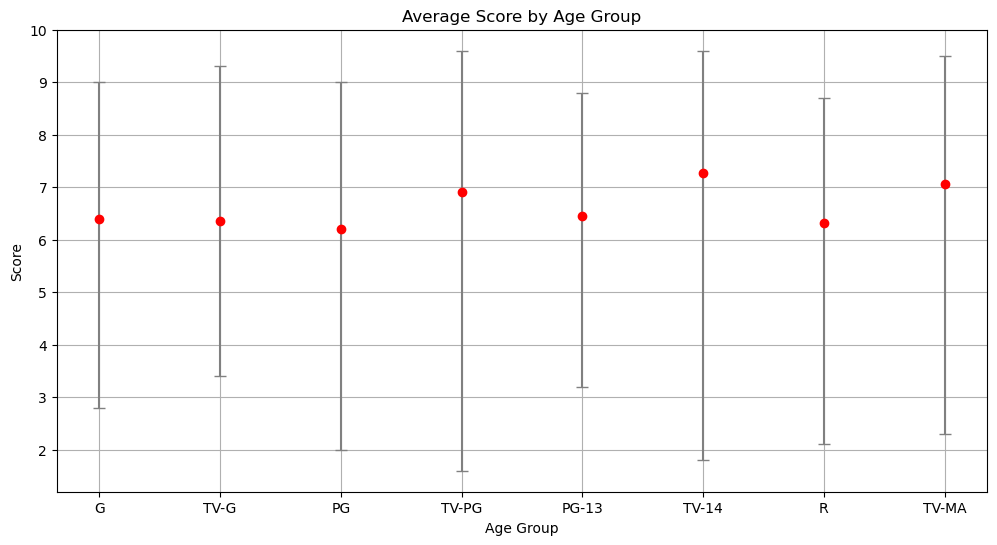

In [230]:
#Create organized list of age groups
age_order = ['G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'R', 'TV-MA']
df['age_group'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

#Group by age and calculate the mean, minimum, and maximum of score of each group
summary_stats = df.groupby('age_group')['imdb_score'].agg(['mean', 'min', 'max'])

#Reset index and convert the result back to DataFrame
summary_stats_df = summary_stats.reset_index()

#Plot
plt.figure(figsize=(12, 6))
plt.errorbar(summary_stats_df['age_group'], summary_stats_df['mean'],
             yerr=[summary_stats_df['mean'] - summary_stats_df['min'], summary_stats_df['max'] - summary_stats_df['mean']],
             fmt='o', color='red', ecolor='gray', capsize=4)
plt.title('Average Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('graph4.png')
plt.show()

### 5. Do the genres of a show or a movie make a difference of the audience's reception of it?

In [231]:
#Function that labels anything with multiple genres as "Multiple Genres"
def label_multiple_genres(genres):
    if pd.notna(genres) and ',' in genres:
        return 'Multiple Genres'
    else:
        return genres

#Apply the function to the genre column
df['genres'] = df['genres'].apply(label_multiple_genres)

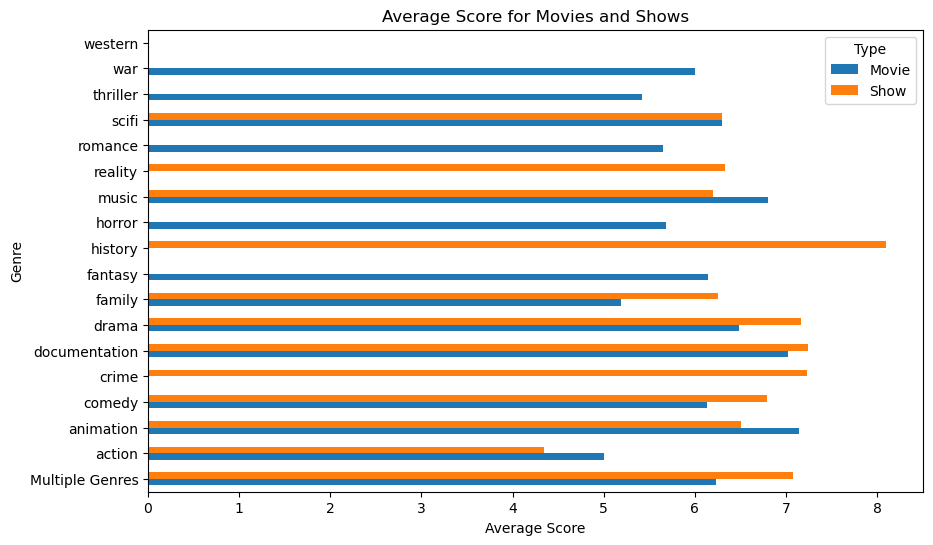

In [232]:
#Group by type and genre, then calculate the average score
average_scores = df.groupby(['type', 'genres'])['imdb_score'].mean().reset_index()

#Pivot the table
average_scores_pivot = average_scores.pivot(index='genres', columns='type', values='imdb_score')

#Plot the data
average_scores_pivot.plot(kind='barh', figsize=(10, 6))
plt.title('Average Score for Movies and Shows')
plt.xlabel('Average Score')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.savefig('graph5.png')
plt.show()